In [34]:
import numpy as np
import math
import random

In [35]:
# defining a kernel function
def kernel(x,y):
    return math.exp((-(x-y)**2)/2)

In [36]:
#efining the MMD function with the help of list comprehension
def computeMMD(x,y,N):
    g = [[kernel(x[i], x[j]) + kernel(y[i],y[j]) - (2*kernel(x[i], y[j])) for j in range(N)] for i in range(N)]
    print("the shape of the matrix g is ", np.shape(g))
    return math.sqrt((sum(map(sum,g)) / N**2)) # the map(sum,g) function will add all the values of the matrix g row wise
    #sum(map(sum,g)) will add all the values of the added values to get a scalar

In [37]:
# same MMD function without list comprehension
def computeMMD_1(x, y, N):
    g_1 = np.zeros((N, N))  # Initialize an NxN matrix with zeros
    for i in range(N):
        for j in range(N):
            g_1[i, j] = kernel(x[i], x[j]) + kernel(y[i], y[j]) - 2 * kernel(x[i], y[j])
    print("The shape of the matrix g_1 is ", np.shape(g_1))
    print("the g_1 matrix is ",g_1)
    return math.sqrt((np.sum(g_1) / N**2))


In [38]:
# x = [1, 2, 3]
# y = [4, 5, 6]
# N = 3
# final_out_1  = computeMMD_1(x,y,N)
# print('the final output is ',final_out_1)

In [39]:
# function for updating the MMD
def update(x,y,n):
    sum = 0 # initialize the sum to 0
    for l in range(n):
        sum += kernel(x[l],x[n-1]) + kernel(y[l],y[n-1]) - (2*kernel(x[l],y[n-1]))
    for m in range(n-1):
        sum += kernel(x[n-1],x[m]) + kernel(y[n-1],y[m]) - (2*kernel(x[n-1],y[m]))
    return sum/(n**2)

In [46]:
def update(x,y,n):
  sum = 0 # initialize the sum to 0
  for l in range(n):
      sum += kernel(x[l],x[n-1]) + kernel(y[l],y[n-1]) - (2*kernel(x[l],y[n-1]))
  for m in range(n-1):
      sum += kernel(x[n-1],x[m]) + kernel(y[n-1],y[m]) - (2*kernel(x[n-1],y[m]))
  return math.sqrt((sum/n**2))


In [52]:
###########     Algorithm 1 KMED-SEQ: Clustering when K is known S    #########

M = 15  # total no of streams
K = 5   # no of clusters
Mk = 3  # no of streams per cluster
correct = [[(Mk*i)+j for j in range(Mk)]for i in range(K)] # indices of the means
means = [[-0.1,0,0.1],[0.9,1,1.1],[1.9,2,2.1],[2.9,3,3.1],[3.9,4,4.1],[4.9,5,5.1]] # defined means

print(correct,means)

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]] [[-0.1, 0, 0.1], [0.9, 1, 1.1], [1.9, 2, 2.1], [2.9, 3, 3.1], [3.9, 4, 4.1], [4.9, 5, 5.1]]


In [ ]:
import math
#constvec = [1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
constvec = [1,2,4,6,8,10,12,14,16,18,20] # constant values of the C used in the algorithm
Pe = np.zeros(len(constvec)) # Vector to store error probabilities for different constants
lnPe=np.zeros(len(constvec)) # Vector to store log of error probabilities
expsamples=np.zeros(len(constvec))  # Vector to store expected number of samples
# print(Pe,lnPe,expsamples)

for ii in range(len(constvec)): # loop will iterate over all the constant values
    const = constvec[ii]
    #initialization of the values to 0
    iter_sum = 0
    error = 0
    total = 0
    while error < 1000:
        ##############  INITIALISATION  ################
        # cluster indices 0 to M-1 and an empty list lst
        clusters = [[i] for i in range(M)] #initialize cluster
        lst = [[] for i in range(M)]  # initialize with an empty list

        # initialize with 2 samples for the MMD estimate
      #  Clusters are initialized with each data stream as a separate cluster. Initial samples are generated from normal distributions with given means.
        nn = 2
        X = np.asarray([np.random.normal(means[j][i],1,nn) for j in range(K) for i in range(Mk)])# Generate initial samples
        # here n is the number of samples to be generated with the given meand and the standard deviation 1
        print("the values in X are ",X)
        ####    Calculating initial MMDs between each pair of sequences and stored in the lst_dseq ####

        lst_dseq =np.zeros((M,M)) #will store the pairwise MMD values between the sequences
        #loops for the pairwisw MMD calculation
        for i in range(1,M):
            for j in range(i):
                lst_dseq[i][j] = computeMMD(X[i,:],X[j,:],nn)
                lst_dseq[j][i] = lst_dseq[i][j]
        #print(lst_fixed)

        ##### TEST-STATISTIC Tn INITIALISATION #####
        Tn = 0 # Initialize the minimum inter-cluster distance
        while Tn < (const/(nn**0.5)):
            nn =nn + 1

            #updating the distance matrix in lst_dc from the lst_dseq
            lst_dc = [[] for i in range(M)]
            lst_dc = [[lst_dseq[i][j] for j in range(i+1)] for i in range(M)]
            for i in range(M):
                for j in range(M):
                    if i<j:
                        lst_dc[i].append(lst_dc[j][i])
            #print(lst_new)

 ######################## Code for SLINK algorithm for the purpose of clustering ##############################
            clusters = [[i] for i in range(M)] # initialize the cluster with each element as a cluster
              while len(clusters)>K: # Merge closest clusters till number of clusters is equal to K

                ####    FIND MINIMUM distance pair   ####
                mi = 100
                for i in range(len(lst_dc)):
                    for j in range(i+1):
                        if i != j:
                            if lst_dc[i][j] < mi:
                                mi = lst_dc[i][j]
                                a,b = [i,j]

                #print("the values of a and b are :", a,b)
                clusters[b].extend(clusters[a])  #merge cluster a and b
                del clusters[a] #delete cluster a
                #print(clusters)

                ####    MERGE ROWS  ####
                for i in range(len(lst_dc[b])):
                    if min(lst_dc[a][i],lst_dc[b][i]) != 0:
                        lst_dc[b][i] = min(lst_dc[a][i],lst_dc[b][i]) #update the distance between the new cluster and the all the other clusters
                del lst_dc[a] # remove all the disatnce related to the cluster a which is already deleted


                ####    UPDATE ROWS     ####
                for i in range(len(lst_dc)):       #update all other rows
                    if i!=b:
                        lst_dc[i][b] = min(lst_dc[i][a],lst_dc[i][b])
                    del lst_dc[i][a]   #new statement


            #print('Clusters after iteration ', nn, ':', clusters)

            mi = 100
            for i in range(len(lst_dc)):
                for j in range(i+1):
                    if i != j:
                        if lst_dc[i][j] < mi:
                            mi = lst_dc[i][j]
            Tn = mi

            # generate one more sample for each data stream
            z = np.asarray([np.random.normal(means[j][i],1,1) for j in range(K) for i in range(Mk)])  #creates a 1 dim array with means and SD 1
            X = np.append(X,z,axis=1)       # new samples   #axis =1 means it will add the values of z along column wise

            #Update MMDs between each pair of data streams
            lst_dseq_1=np.zeros((M,M))
            for i in range(M):
                for j in range(i):
                    lst_dseq_1[i,j] = math.sqrt(((lst_dseq[i][j]*(nn-1)/nn)**2) + update(X[i,:],X[j,:],nn))      # updated distances
                    lst_dseq_1[j,i]=lst_dseq_1[i,j]
            for i in range(M):
                for j in range(M):
                    lst_dseq[i,j] =lst_dseq_1[i,j]

        #print('Minimum inter-cluster distance after iteration ', nn, ':', Tn)
        #print('Clusters after iteration ', nn, ':', clusters)
        #print('Errors', error)
        #print('Total', total)

        # Check if clustering is correct and update errors and number of samples taken
        iter_sum += nn
        # CHECKING IF IT'S CORRECT
        clusters.sort()
        C_sort = []
        for x in clusters:
            x.sort()
            C_sort.append(x)

        if C_sort != correct:
            error = error + 1
        total = total + 1

        #print(C_sort)


    Pe[ii] = error/total
    lnPe[ii] = math.log(Pe[ii])
    expsamples[ii]= iter_sum/total
    print(lnPe[ii],expsamples[ii])

print(total,expsamples,lnPe)
print(iter_sum / total)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0 3.011
0.0 5.909
-0.043059489460447 14.840038314176246
-0.2287279296081104 24.176610978520287
-0.554459660786052 33.047673750717976
-0.9913982043609606 41.39666048237477
-1.3905353553771451 49.32885237739607
-1.8356168522918315 56.789280587015476
-2.2346273998108184 63.94530664668736
-2.699278508715086 70.86703880556863
-3.136927970220768 77.56562323622629
23033 [ 3.011       5.909      14.84003831 24.17661098 33.04767375 41.39666048
 49.32885238 56.78928059 63.94530665 70.86703881 77.56562324] [ 0.          0.         -0.04305949 -0.22872793 -0.55445966 -0.9913982
 -1.39053536 -1.83561685 -2.2346274  -2.69927851 -3.13692797]
77.56562323622629


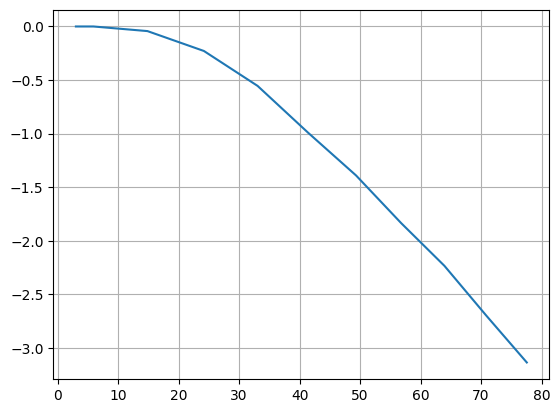

In [ ]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(expsamples,lnPe)
x=[0.31578947,0.25423729,0.1056338,0.06396588,0.03807107]
y=[-1.15267951,-1.36948724,-2.24777686,-2.74940539,-3.26830071]
